<a href="https://colab.research.google.com/github/yscmrth/Analisis-Multivariat/blob/main/KOMPRE_ANALISISSENTIMEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Baca file Excel
data = pd.read_excel('/content/drive/MyDrive/SKRIPSI/KOMPRE_DATASKRIPSI.xlsx')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,userName,content,data_cleaned,formal_text,tokenized_text,stopword_removed,stemmed_text,translated,compound,sentimen,remove_y,remove_y_id
0,Ayu Rahayu,Shopee makin ksni makin lemot niat gk sih ngas...,shopee makin ksni makin lemot niat gk sih ngas...,shopee semakin ke sini semakin lambat niat tid...,"['shopee', 'semakin', 'ke', 'sini', 'semakin',...","['lambat', 'niat', 'tidak', 'voucher', 'tidak'...",lambat niat tidak voucher tidak pak...,sluggish intention no voucher no used network ...,-0.8750,negatif,intention no voucher no used network caution m...,niat voucher pakai jaring awas tinggal onli...
1,Kadar Tono,"Pelayanan di Shopee mantap, tapi tolong seller...",pelayanan di shopee mantap tapi tolong seller ...,pelayanan di shopee mantap tapi tolong penjual...,"['pelayanan', 'di', 'shopee', 'mantap', 'tapi'...","['pelayanan', 'mantap', 'tolong', 'penjual', '...",layan mantap tolong jual sifat kece...,service great please help seller nature disapp...,0.9501,positif,service please seller nature please cross chec...,layan tolong jual sifat mohon silang cek teri...
2,Hasbi Mr,Akun spay letter dinonaktifkan. Alasan perbeda...,akun spay letter dinonaktifkan alasan perbedaa...,akun shopeepay later dinonaktifkan alasan perb...,"['akun', 'shopeepay', 'later', 'dinonaktifkan'...","['akun', 'shopeepay', 'later', 'dinonaktifkan'...",akun shopeepay later nonaktif alas ...,shopeepay later account is deactivated for dif...,-0.4964,negatif,shopeepay later account is deactivated for dif...,akun shopeepay later nonaktif alas beda data b...
3,Yoan Indah Yani,Sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,sangat membantu dan harga juga bersahabat,"['sangat', 'membantu', 'dan', 'harga', 'juga',...","['membantu', 'harga', 'bersahabat']",bantu harga sahabat,help the price friend,0.7096,positif,the price,harga
4,Nisha Mahfudz,"Makin kesini makin kesana, makin2 pelit makin2...",makin kesini makin kesana makin pelit makin er...,semakin ke sini semakin ke sana semakin pelit ...,"['semakin', 'ke', 'sini', 'semakin', 'ke', 'sa...","['pelit', 'eror', 'tidak', 'jelas']",pelit eror tidak jelas,stingy with errors no clear,-0.5994,negatif,stingy with errors no,pelit jelas jelas
...,...,...,...,...,...,...,...,...,...,...,...,...
181560,Kiat Yeo,Murah dan cepat banget sampai nya,murah dan cepat banget sampai nya,murah dan cepat sangat sampai nya,"['murah', 'dan', 'cepat', 'sangat', 'sampai', ...","['murah', 'cepat']",murah cepat,cheap fast,0.0000,netral,cheap fast,murah cepat
181561,mulehhh 05,"koin shopee 211rb, pas cek kaget bgt sisa 89rb...",koin shopee rb pas cek kaget bgt sisa rb chat ...,koin shopee ribu ketika check kaget sangat sis...,"['koin', 'shopee', 'ribu', 'ketika', 'check', ...","['koin', 'ribu', 'check', 'kaget', 'sisa', 'ri...",koin ribu check kaget sisa ribu o...,coin thousand check startled remains thousand ...,-0.4367,negatif,coin thousand check startled remains thousand ...,koin ribu check kaget sisa ribu obrol customer...
181562,dr.waloejo Soetoto,Nggangu proses ber tilphon.,nggangu proses ber tilphon,mengganggu proses ber telepon,"['mengganggu', 'proses', 'ber', 'telepon']","['mengganggu', 'proses', 'telepon']",ganggu proses telepon,bother process telephone,-0.3400,negatif,bother process telephone,proses telepon
181563,Ayu Love Sarell,Sangat mudah di gunakn,sangat mudah di gunakn,sangat mudah di gunakan,"['sangat', 'mudah', 'di', 'gunakan']","['mudah', 'gunakan']",mudah guna,easy use,0.4404,positif,use,guna


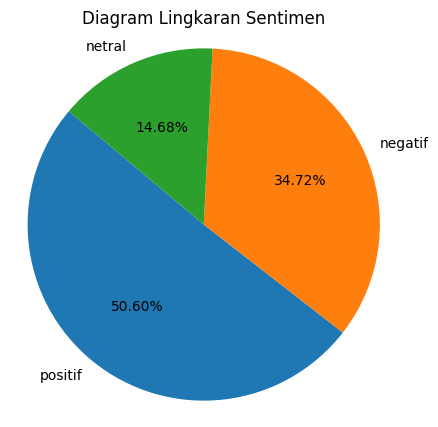

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Anda
s = pd.value_counts(data['sentimen'])

# Membuat diagram lingkaran
plt.figure(figsize=(5, 5))
plt.pie(s, labels=s.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.title('Diagram Lingkaran Sentimen')
plt.show()

WordCloud untuk label 'negatif':


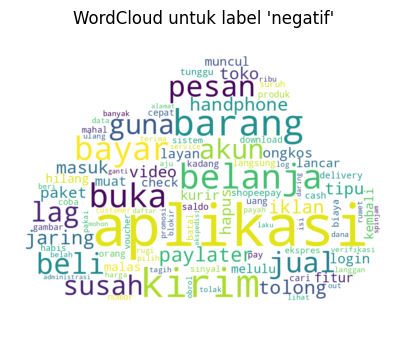

WordCloud untuk label 'positif':


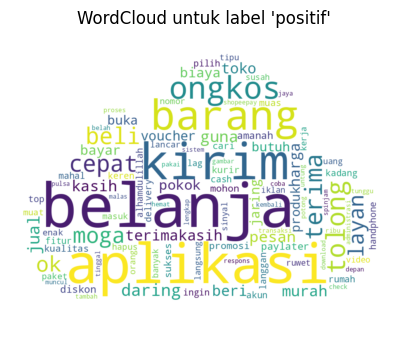

WordCloud untuk label 'netral':


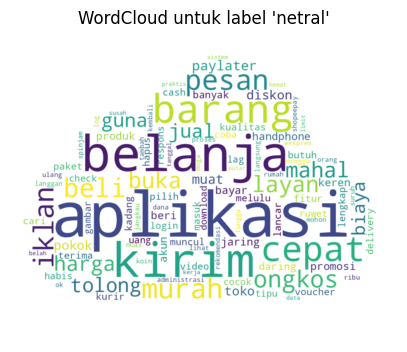

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Dictionary untuk menyimpan kata-kata teratas untuk setiap label
top_words_by_label = {}

# Menghitung frekuensi kemunculan kata-kata untuk setiap label
for sentimen in data['sentimen'].unique():
    filtered_text = ' '.join(data[data['sentimen'] == sentimen]['remove_y_id'])
    words = filtered_text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(100)
    top_words_by_label[sentimen] = top_words

# Fungsi untuk membuat WordCloud dari kata-kata teratas dengan gambar sebagai mask
def generate_wordcloud_with_mask(words_freq, mask_image_path, title):
    # Membaca gambar mask
    mask = np.array(Image.open(mask_image_path))

    # Membuat WordCloud dengan menggunakan gambar mask
    wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask).generate_from_frequencies(dict(words_freq))

    # Menampilkan WordCloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Lokasi gambar mask
mask_image_path = "cloud.png"

# Menggunakan gambar sebagai mask untuk WordCloud
for sentimen, top_words in top_words_by_label.items():
    print(f"WordCloud untuk label '{sentimen}':")
    generate_wordcloud_with_mask(dict(top_words), mask_image_path, f'WordCloud untuk label \'{sentimen}\'')

In [ ]:
# Hitung jumlah data dengan sentimen positif, negatif, dan netral
sentiment_counts = data['sentimen'].value_counts()


# Tampilkan hasil perhitungan
print("Jumlah data dengan sentimen positif:", sentiment_counts['positif'])
print("Jumlah data dengan sentimen negatif:", sentiment_counts['negatif'])
print("Jumlah data dengan sentimen netral:", sentiment_counts['netral'])

Jumlah data dengan sentimen positif: 91865
Jumlah data dengan sentimen negatif: 63038
Jumlah data dengan sentimen netral: 26662


In [ ]:
# Mendapatkan bobot IDF untuk setiap fitur
bobot_idf = tfidf_vectorizer.idf_

# Menampilkan bobot IDF tiap fitur
for fitur, idf in zip(fitur_tfidf, bobot_idf):
    print(f"Fitur: {fitur}, Bobot IDF: {idf}")

Streaming output truncated to the last 5000 lines.
Fitur: cewa, Bobot IDF: 10.71147923015263
Fitur: cewek, Bobot IDF: 8.643466384296417
Fitur: chaca, Bobot IDF: 12.01076221428289
Fitur: champion, Bobot IDF: 12.416227322391054
Fitur: chana, Bobot IDF: 12.416227322391054
Fitur: channel, Bobot IDF: 11.029932961271165
Fitur: charge, Bobot IDF: 10.71147923015263
Fitur: charger, Bobot IDF: 11.4999365905169
Fitur: chat, Bobot IDF: 8.739926650483978
Fitur: cheackout, Bobot IDF: 12.416227322391054
Fitur: check, Bobot IDF: 5.159930082700375
Fitur: checker, Bobot IDF: 12.416227322391054
Fitur: checkin, Bobot IDF: 10.470317173335742
Fitur: checklist, Bobot IDF: 10.018332049592685
Fitur: checkout, Bobot IDF: 6.39036134856574
Fitur: cheout, Bobot IDF: 12.416227322391054
Fitur: chief, Bobot IDF: 10.806789409956954
Fitur: chip, Bobot IDF: 10.470317173335742
Fitur: chipset, Bobot IDF: 10.470317173335742
Fitur: choki, Bobot IDF: 10.018332049592685
Fitur: chokonan, Bobot IDF: 12.416227322391054
Fitur: ch

In [ ]:
# Ambil contoh satu ulasan untuk ditampilkan bobot TF-IDF-nya
contoh_review = X_tfidf[0]

# Dapatkan daftar fitur unik yang diekstraksi oleh TfidfVectorizer
fitur_tfidf = tfidf_vectorizer.get_feature_names_out()

# Dapatkan indeks fitur unik pada contoh ulasan
indeks_fitur = contoh_review.indices

# Dapatkan bobot TF-IDF pada contoh ulasan
bobot_tfidf = contoh_review.data

# Dapatkan bobot IDF untuk setiap fitur
bobot_idf = tfidf_vectorizer.idf_

# Tampilkan bobot IDF dari setiap fitur
for idx, fitur_idx in enumerate(indeks_fitur):
    fitur = fitur_tfidf[fitur_idx]
    idf = bobot_idf[fitur_idx]
    tfidf = bobot_tfidf[idx]
    print(f"Fitur: {fitur}, Bobot IDF: {idf}, Bobot TF-IDF: {tfidf}")

Fitur: shop, Bobot IDF: 6.97814801346786, Bobot TF-IDF: 6.97814801346786
Fitur: online, Bobot IDF: 6.482656753701975, Bobot TF-IDF: 6.482656753701975
Fitur: tinggal, Bobot IDF: 5.998678379972173, Bobot TF-IDF: 5.998678379972173
Fitur: awas, Bobot IDF: 8.524407024280428, Bobot TF-IDF: 8.524407024280428
Fitur: jaring, Bobot IDF: 4.353006943148025, Bobot TF-IDF: 4.353006943148025
Fitur: pakai, Bobot IDF: 5.614388269000467, Bobot TF-IDF: 5.614388269000467
Fitur: voucher, Bobot IDF: 4.857189066947671, Bobot TF-IDF: 4.857189066947671
Fitur: niat, Bobot IDF: 6.861331628442571, Bobot TF-IDF: 6.861331628442571


In [ ]:
# Jumlah data train
jumlah_data_train = X_train.shape[0]
print("Jumlah data train:", jumlah_data_train)

# Jumlah data test
jumlah_data_test = X_test.shape[0]
print("Jumlah data test:", jumlah_data_test)

# Menghitung sentimen pada data latih
train_sentiment_counts = y_train.value_counts()
print("Jumlah sentimen positif dan negatif pada data latih:")
print(train_sentiment_counts)

# Menghitung sentimen pada data uji
test_sentiment_counts = y_test.value_counts()
print("\nJumlah sentimen positif dan negatif pada data uji:")
print(test_sentiment_counts)

Jumlah data train: 145252
Jumlah data test: 36313
Jumlah sentimen positif dan negatif pada data latih:
positif    73549
negatif    50466
netral     21237
Name: sentimen, dtype: int64

Jumlah sentimen positif dan negatif pada data uji:
positif    18316
negatif    12572
netral      5425
Name: sentimen, dtype: int64


In [ ]:
# Cari indeks kata "voucher" dalam daftar nama fitur
index_voucher = df_tfidf.columns[df_tfidf.columns == 'voucher']

# Periksa apakah "voucher" ada dalam daftar nama fitur
if len(index_voucher) > 0:
    # Jika "voucher" ditemukan, tampilkan nilai-nilai vektor TF-IDF untuk kata "voucher"
    df_voucher = df_tfidf[['voucher']]
    print(df_voucher)
else:
    print("Kata 'voucher' tidak ditemukan dalam vektor TF-IDF.")

         voucher
0       4.857189
1       0.000000
2       0.000000
3       0.000000
4       0.000000
...          ...
181560  0.000000
181561  0.000000
181562  0.000000
181563  0.000000
181564  0.000000

[181565 rows x 1 columns]


MODEL FFNN 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import Sequence
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN.h5'

# Define ModelCheckpoint callback to save the best model to Google Drive
checkpoint_ffnn = ModelCheckpoint(filepath_ffnn, monitor='accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pra-pemrosesan data dengan TfidfVectorizer tanpa normalisasi
tfidf_vectorizer = TfidfVectorizer(use_idf=True, norm=None)
X_tfidf = tfidf_vectorizer.fit_transform(data['remove_y_id'])

# Pembagian data train dan test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['sentimen'], test_size=0.2, random_state=42)

# Ubah TF-IDF sparse matrix menjadi dense array
X_train_array = X_train.toarray()
X_test_array = X_test.toarray()

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_array, pd.get_dummies(y_train), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_ffnn = Sequential()
model_ffnn.add(Dense(137, input_shape=(X_train_array.shape[1],), activation= 'sigmoid'))
model_ffnn.add(Dense(3, activation='softmax'))
model_ffnn.summary()

# Compile the model
model_ffnn.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model with training data and valiMOdate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_ffnn = model_ffnn.fit_generator(train_generator,
                                        epochs=20,
                                        steps_per_epoch=len(train_generator),
                                        callbacks=[checkpoint_ffnn, early_stopping])

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 137)               860908    
                                                                 
 dense_1 (Dense)             (None, 3)                 414       
                                                                 
Total params: 861322 (3.29 MB)
Trainable params: 861322 (3.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


<ipython-input-6-c3a48b91f49f>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_ffnn = model_ffnn.fit_generator(train_generator,


4535/4540 [============================>.] - ETA: 0s - loss: 0.8418 - accuracy: 0.6344
Epoch 1: accuracy improved from -inf to 0.63444, saving model to /content/drive/My Drive/models/modelFFNN.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4540/4540 [==============================] - 22s 4ms/step - loss: 0.8418 - accuracy: 0.6344
Epoch 2/20
4537/4540 [============================>.] - ETA: 0s - loss: 0.7738 - accuracy: 0.6761
Epoch 2: accuracy improved from 0.63444 to 0.67600, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 19s 4ms/step - loss: 0.7738 - accuracy: 0.6760
Epoch 3/20
4538/4540 [============================>.] - ETA: 0s - loss: 0.7609 - accuracy: 0.6796
Epoch 3: accuracy improved from 0.67600 to 0.67960, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 17s 4ms/step - loss: 0.7609 - accuracy: 0.6796
Epoch 4/20
4540/4540 [==============================] - ETA: 0s - loss: 0.7530 - accuracy: 0.6831
Epoch 4: accuracy improved from 0.67960 to 0.68306, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 18s 4ms/step - loss: 0.7530 - accuracy: 0.6831
Ep

Evaluasi Model FFNN 1

1135/1135 [==============================] - 7s 6ms/step - loss: 0.7359 - accuracy: 0.6874
Accuracy FFNN: 0.6873571276664734
1135/1135 [==============================] - 2s 2ms/step


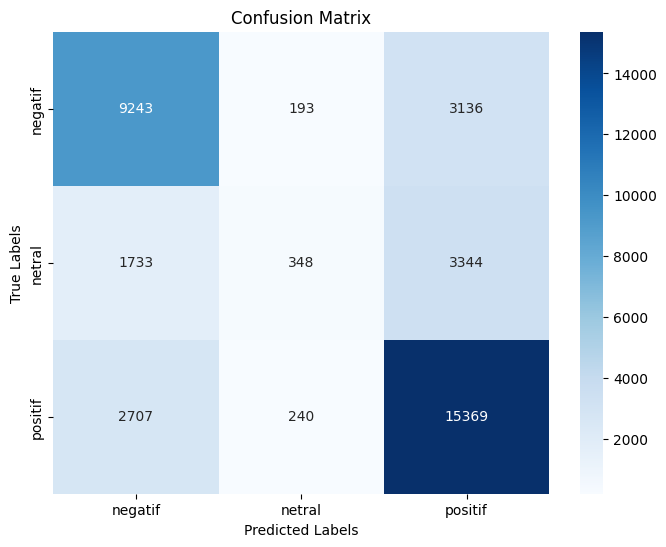

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

# Membuat prediksi menggunakan model
y_pred_prob = model_ffnn.predict(X_test_array)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (6283, 137)
Weight Matrix:
[[-0.00430951  0.03200034 -0.0293923  ... -0.00660023 -0.02561573
   0.04380741]
 [ 0.01266684  0.01935016  0.01533287 ...  0.01904648  0.022265
   0.01758849]
 [-0.00548528 -0.03244177  0.01554596 ...  0.0040643  -0.01731596
  -0.01984057]
 ...
 [ 0.02004205 -0.0177333  -0.00731171 ...  0.01052066  0.00538692
  -0.00243272]
 [-0.03365859  0.00990349  0.01932488 ...  0.03434319 -0.02498781
  -0.00087169]
 [-0.02427913 -0.00922856 -0.01190833 ... -0.03236665  0.01917639
  -0.03152366]]
Bias Vector Shape: (137,)
Bias Vector:
[ 0.00588714  0.00383575 -0.03468521 -0.0072069  -0.00684554  0.00387011
 -0.00783389 -0.00601857 -0.00455695 -0.00844836 -0.00281344  0.02557809
 -0.01095902 -0.00749462 -0.01233837 -0.00493118 -0.00288856 -0.00755892
  0.00321623 -0.00765075 -0.0076324  -0.00893362 -0.01006742  0.16318901
  0.00915427 -0.00861341 -0.00699802  0.13700967 -0.07102854 -0.0136669
 -0.00799221 -0.0064154  -0.06167194 -0.0

In [ ]:
# Inisialisasi dictionary untuk menyimpan bobot dan bias dari setiap layer
weights_biases = {}

# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights, biases = layer.get_weights()
        # Simpan bobot dan bias dalam dictionary dengan menggunakan nama layer
        weights_biases[layer.name] = {'weights': weights, 'biases': biases}

# Contoh penggunaan:
hidden_layer_biases = weights_biases['dense']['biases']
output_layer_weights = weights_biases['dense_1']['weights']

# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer_name, params in weights_biases.items():
    # Cetak informasi tentang bobot dan bias
    print(f"Layer Name: {layer_name}")
    print("Weight Matrix Shape:", params['weights'].shape)  # Ukuran matriks bobot
    print("Weight Matrix:")
    print(params['weights'])  # Bobot
    print("Bias Vector Shape:", params['biases'].shape)    # Ukuran vektor bias
    print("Bias Vector:")
    print(params['biases'])    # Bias
    print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (6283, 137)
Weight Matrix:
[[-0.00430951  0.03200034 -0.0293923  ... -0.00660023 -0.02561573
   0.04380741]
 [ 0.01266684  0.01935016  0.01533287 ...  0.01904648  0.022265
   0.01758849]
 [-0.00548528 -0.03244177  0.01554596 ...  0.0040643  -0.01731596
  -0.01984057]
 ...
 [ 0.02004205 -0.0177333  -0.00731171 ...  0.01052066  0.00538692
  -0.00243272]
 [-0.03365859  0.00990349  0.01932488 ...  0.03434319 -0.02498781
  -0.00087169]
 [-0.02427913 -0.00922856 -0.01190833 ... -0.03236665  0.01917639
  -0.03152366]]
Bias Vector Shape: (137,)
Bias Vector:
[ 0.00588714  0.00383575 -0.03468521 -0.0072069  -0.00684554  0.00387011
 -0.00783389 -0.00601857 -0.00455695 -0.00844836 -0.00281344  0.02557809
 -0.01095902 -0.00749462 -0.01233837 -0.00493118 -0.00288856 -0.00755892
  0.00321623 -0.00765075 -0.0076324  -0.00893362 -0.01006742  0.16318901
  0.00915427 -0.00861341 -0.00699802  0.13700967 -0.07102854 -0.0136669
 -0.00799221 -0.0064154  -0.06167194 -0.0

Prediksi Data Uji Model FFNN 1



In [ ]:
import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Fungsi forward pass manual
def manual_forward_pass(X, weights_biases):
    # Hidden layer input (Z1)
    hidden_layer_input = np.dot(X, weights_biases['dense']['weights']) + weights_biases['dense']['biases']
    # Hidden layer output (A1)
    hidden_layer_output = sigmoid(hidden_layer_input)

    # Output layer input (Z2)
    output_layer_input = np.dot(hidden_layer_output, weights_biases['dense_1']['weights']) + weights_biases['dense_1']['biases']
    # Output layer output (A2)
    output_layer_output = softmax(output_layer_input)

    return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

# Misalkan X_test_sample adalah contoh data uji pertama
X_test_sample = X_test_array[8].reshape(1, -1)

# Misalkan weights_biases adalah bobot dan bias yang diperoleh dari pelatihan model
hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = manual_forward_pass(X_test_sample, weights_biases)

print("Hidden Layer Input (Z1):")
print(hidden_layer_input)
print("\nHidden Layer Output (A1):")
print(hidden_layer_output)
print("\nOutput Layer Input (Z2):")
print(output_layer_input)
print("\nOutput Layer Output (A2):")
print(output_layer_output)

Hidden Layer Input (Z1):
[[ 9.83560416e-01  6.08248209e-01 -9.29516953e-01 -4.27478186e-01
   1.20724061e-01 -8.48760156e-01  1.91655971e-02 -5.71076579e-02
  -2.97656868e-01 -7.84017469e-02 -9.04528261e-01  9.20766000e-01
  -8.53756176e-01  1.49121476e-01 -4.82044592e-01  1.29910793e+00
  -2.59194933e-01  1.32802173e-01  1.07698696e+00  6.49521086e-01
  -3.59988781e-01 -3.74847050e-01  5.70056728e-01  6.93229751e+00
   9.73693353e-01 -6.32540225e-01 -2.83750621e-01  7.19156148e+00
  -2.02432410e+00 -4.02795238e-02 -3.76869205e-01 -5.04398423e-02
  -2.12338201e+00  3.60973431e-01  5.44062850e-01  3.84504160e-02
  -3.02542237e+00  1.21495924e+00 -5.01484760e+00  1.27663429e+00
   2.64031565e-01  4.73628364e-01  1.08694462e+00 -5.35825434e-01
   1.00038925e-01 -2.41560943e+00  2.28787134e+00 -7.75422988e-01
  -3.57183976e-01  6.75008112e-01  2.80989385e-01 -7.99130671e-01
  -5.85551908e-01 -8.08363882e-01  3.02343336e+00  1.09353246e-01
  -7.34759004e-03 -2.16618388e-01 -5.87145729e-01 -

Load Model FFNN 1

In [ ]:
from keras.models import load_model
model_ffnn = load_model('/content/drive/My Drive/models/modelFFNN.h5')
model_ffnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 137)               860908    
                                                                 
 dense_1 (Dense)             (None, 3)                 414       
                                                                 
Total params: 861322 (3.29 MB)
Trainable params: 861322 (3.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


MODEL FFNN 2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN2.h5'

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_ffnn = '/content/drive/My Drive/models/modelFFNN2.h5'

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_ffnn2 = Sequential()
model_ffnn2.add(Dense(491, input_shape=(X_train_array.shape[1],), activation= 'sigmoid'))
model_ffnn2.add(Dense(38, activation='sigmoid'))
model_ffnn2.add(Dense(3, activation='softmax'))
model_ffnn2.summary()

# Compile the model
model_ffnn2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_ffnn2 = model_ffnn2.fit_generator(train_generator,
                                          epochs=20,
                                          steps_per_epoch=len(train_generator),
                                          callbacks=[checkpoint_ffnn, early_stopping])

# Evaluate the model with test data
loss_ffnn2, accuracy_ffnn2 = model_ffnn2.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN2:", accuracy_ffnn2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 491)               3085444   
                                                                 
 dense_1 (Dense)             (None, 38)                18696     
                                                                 
 dense_2 (Dense)             (None, 3)                 117       
                                                                 
Total params: 3104257 (11.84 MB)
Trainable params: 3104257 (11.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


<ipython-input-6-afa3d192aa78>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_ffnn2 = model_ffnn2.fit_generator(train_generator,


4540/4540 [==============================] - ETA: 0s - loss: 0.9139 - accuracy: 0.5785
Epoch 1: accuracy improved from -inf to 0.57848, saving model to /content/drive/My Drive/models/modelFFNN.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4540/4540 [==============================] - 20s 4ms/step - loss: 0.9139 - accuracy: 0.5785
Epoch 2/20
4536/4540 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6654
Epoch 2: accuracy improved from 0.57848 to 0.66539, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 19s 4ms/step - loss: 0.8050 - accuracy: 0.6654
Epoch 3/20
4526/4540 [============================>.] - ETA: 0s - loss: 0.7773 - accuracy: 0.6753
Epoch 3: accuracy improved from 0.66539 to 0.67519, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 18s 4ms/step - loss: 0.7774 - accuracy: 0.6752
Epoch 4/20
4533/4540 [============================>.] - ETA: 0s - loss: 0.7648 - accuracy: 0.6777
Epoch 4: accuracy improved from 0.67519 to 0.67767, saving model to /content/drive/My Drive/models/modelFFNN.h5
4540/4540 [==============================] - 19s 4ms/step - loss: 0.7648 - accuracy: 0.6777
Ep

Evaluasi Model FFNN 2

1135/1135 [==============================] - 3s 2ms/step - loss: 0.7373 - accuracy: 0.6851
Accuracy FFNN: 0.685126543045044
1135/1135 [==============================] - 2s 2ms/step


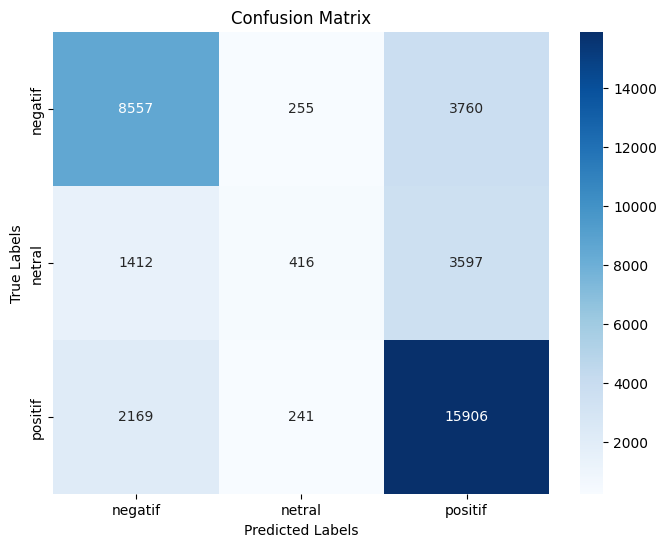

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model with test data
loss_ffnn, accuracy_ffnn = model_ffnn2.evaluate(X_test_array, pd.get_dummies(y_test))
print("Accuracy FFNN:", accuracy_ffnn)

# Membuat prediksi menggunakan model
y_pred_prob = model_ffnn2.predict(X_test_array)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn2.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense_2
Weight Matrix Shape: (6283, 491)
Weight Matrix:
[[-0.01759351 -0.01426721 -0.00908705 ... -0.03164054  0.00357758
  -0.00865819]
 [ 0.0073594  -0.01132997  0.00307848 ...  0.0084164   0.00544785
   0.02194523]
 [ 0.02026189  0.02693553 -0.0100614  ...  0.00727498  0.0080187
   0.02655896]
 ...
 [-0.02493139 -0.01190131 -0.00200243 ...  0.02092591  0.02224445
  -0.02519073]
 [-0.02567407  0.00624254  0.01755736 ... -0.00144928 -0.01788444
  -0.00194336]
 [-0.0271287   0.01680088 -0.02799824 ...  0.00202368 -0.00675109
   0.01708863]]
Bias Vector Shape: (491,)
Bias Vector:
[-1.4947855e-03 -5.3634550e-03 -5.1694484e-03 -4.9959496e-03
 -2.7166356e-04 -1.1442265e-03 -3.9603808e-03 -6.3544759e-03
 -2.4109811e-03 -9.6300375e-03 -1.3784054e-03 -3.1058181e-03
 -4.7902362e-03 -4.2144633e-03 -4.4917539e-03 -4.9497741e-03
  1.2477859e-03 -9.2835464e-03 -2.5010316e-03 -3.4212407e-03
 -4.6243961e-03 -4.5427351e-04 -1.9459289e-03  7.3054438e-03
  5.3438125e-04 -2.8637026e-03 -5.26

In [ ]:
# Loop melalui semua layer dalam model FFNN yang sudah dimuat
for layer in model_ffnn2.layers:
    # Periksa apakah layer adalah lapisan Dense
    if isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        # Cetak informasi tentang bobot
        print(f"Layer Name: {layer.name}")
        print("Weight Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
        print("Weight Matrix:")
        print(weights[0])  # Bobot
        print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
        print("Bias Vector:")
        print(weights[1])    # Bias
        print("-----------------------------------")

Layer Name: dense
Weight Matrix Shape: (6283, 491)
Weight Matrix:
[[ 0.01493909 -0.01167382 -0.01658664 ...  0.01666071 -0.0087592
   0.02453245]
 [ 0.00717359 -0.01577204  0.00133587 ...  0.01430485  0.00383368
   0.00077109]
 [-0.01981954  0.02430512 -0.00545868 ... -0.00860196  0.02030724
  -0.00279327]
 ...
 [-0.02410707 -0.00406355 -0.00531106 ...  0.00972309 -0.02592321
   0.02367144]
 [ 0.00442673  0.00229238 -0.0165553  ...  0.0089723   0.01964024
   0.02204917]
 [ 0.02431909  0.02045476 -0.00881033 ...  0.00978551 -0.00164927
   0.0204106 ]]
Bias Vector Shape: (491,)
Bias Vector:
[-5.61607024e-03 -3.92782688e-03 -1.94932912e-02 -3.05052241e-03
 -3.96169117e-03 -3.90056707e-03 -3.59516335e-03 -3.12647340e-03
 -3.40060168e-03 -2.77696410e-04 -1.89902447e-03 -4.28244425e-03
  1.33229187e-03 -4.10169410e-03 -3.16858850e-03 -3.61580751e-03
  6.81161089e-03 -2.23339745e-03 -4.26030112e-03 -3.64728551e-03
 -3.57213942e-03  4.06699633e-04 -6.15456142e-03 -4.32102708e-03
 -4.89599444e-

Prediksi Data Uji Model FFNN 2

In [ ]:
import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Get weights and biases of the first layer
weights_layer1 = model_ffnn2.layers[0].get_weights()
W1, b1 = weights_layer1

# Get weights and biases of the second layer
weights_layer2 = model_ffnn2.layers[1].get_weights()
W2, b2 = weights_layer2

# Get weights and biases of the output layer
weights_output_layer = model_ffnn2.layers[2].get_weights()
W_output, b_output = weights_output_layer

# Define forward pass function
def forward_pass_ffnn2(X, W1, b1, W2, b2, W_output, b_output):
    # First hidden layer input
    hidden_layer_input1 = np.dot(X, W1) + b1
    # First hidden layer output
    hidden_layer_output1 = sigmoid(hidden_layer_input1)

    # Second hidden layer input
    hidden_layer_input2 = np.dot(hidden_layer_output1, W2) + b2
    # Second hidden layer output
    hidden_layer_output2 = sigmoid(hidden_layer_input2)

    # Output layer input
    output_layer_input = np.dot(hidden_layer_output2, W_output) + b_output
    # Output layer output
    output_layer_output = softmax(output_layer_input)

    return output_layer_output

# Misalkan X_test_sample adalah contoh data uji pertama
X_test_sample = X_test_array[8].reshape(1, -1)

# Perform forward pass on the test sample
output_layer_output = forward_pass_ffnn2(X_test_sample, W1, b1, W2, b2, W_output, b_output)

# Print the results
print("Output Layer Output:")
print(output_layer_output)

Output Layer Output:
[[0.76749537 0.03328867 0.19921596]]


Load Model FFNN 2

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
model_ffnn2= load_model('/content/drive/My Drive/models/modelFFNN2.h5')

# Menginisialisasi dan menerapkan LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Melakukan prediksi pada data uji menggunakan model yang sudah dimuat
y_pred = np.argmax(model_ffnn2.predict(X_test_array), axis=1)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Menampilkan matriks konfusi
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Menghitung nilai akurasi
accuracy = accuracy_score(y_true_encoded, y_pred)
print("Accuracy:", accuracy)

1135/1135 [==============================] - 4s 2ms/step
Confusion Matrix:
[[ 8557   255  3760]
 [ 1412   416  3597]
 [ 2169   241 15906]]
Classification Report:
              precision    recall  f1-score   support

     negatif       0.70      0.68      0.69     12572
      netral       0.46      0.08      0.13      5425
     positif       0.68      0.87      0.77     18316

    accuracy                           0.69     36313
   macro avg       0.61      0.54      0.53     36313
weighted avg       0.66      0.69      0.65     36313

Accuracy: 0.685126538705147


Model LSTM 1

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_lstm = '/content/drive/My Drive/models/modelLSTM.h5'

# Define ModelCheckpoint callback to save the best model
checkpoint_lstm = ModelCheckpoint(filepath_lstm, monitor='accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y


# Ubah dimensi input untuk LSTM
X_train_3d = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_3d = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_3d, pd.get_dummies(y_train), batch_size)

# Membuat instance dari DataGenerator untuk data validasi
validation_generator = DataGenerator(X_test_3d, pd.get_dummies(y_test), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(137, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2]), recurrent_activation="sigmoid", activation="tanh"))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.summary()

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model with training data
history_lstm = model_lstm.fit(train_generator,
                              epochs=20,
                              steps_per_epoch=len(train_generator),
                              callbacks=[checkpoint_lstm])

# Evaluate the model with test data
loss, accuracy = model_lstm.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Accuracy:", accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 137)               3518708   
                                                                 
 dense_1 (Dense)             (None, 3)                 414       
                                                                 
Total params: 3519122 (13.42 MB)
Trainable params: 3519122 (13.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
4531/4540 [============================>.] - ETA: 0s - loss: 0.8382 - accuracy: 0.6397
Epoch 1: accuracy improved from -inf to 0.63979, saving model to /content/drive/My Drive/models/modelLSTM.h5
4540/4540 [==============================] - 29s 6ms/step - loss: 0.8380 - accuracy: 0.6398
Epoch 2/20
  11/4540 [..............................] - ETA: 23s - loss: 0.7672 - accuracy: 0.6960 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4540/4540 [==============================] - ETA: 0s - loss: 0.7622 - accuracy: 0.6787
Epoch 2: accuracy improved from 0.63979 to 0.67868, saving model to /content/drive/My Drive/models/modelLSTM.h5
4540/4540 [==============================] - 27s 6ms/step - loss: 0.7622 - accuracy: 0.6787
Epoch 3/20
4540/4540 [==============================] - ETA: 0s - loss: 0.7431 - accuracy: 0.6851
Epoch 3: accuracy improved from 0.67868 to 0.68513, saving model to /content/drive/My Drive/models/modelLSTM.h5
4540/4540 [==============================] - 28s 6ms/step - loss: 0.7431 - accuracy: 0.6851
Epoch 4/20
4534/4540 [============================>.] - ETA: 0s - loss: 0.7318 - accuracy: 0.6886
Epoch 4: accuracy improved from 0.68513 to 0.68857, saving model to /content/drive/My Drive/models/modelLSTM.h5
4540/4540 [==============================] - 27s 6ms/step - loss: 0.7318 - accuracy: 0.6886
Epoch 5/20
4533/4540 [============================>.] - ETA: 0s - loss: 0.7238 - accuracy: 0.6918
Epoch 5

Evaluasi Model LSTM 1

1135/1135 [==============================] - 4s 4ms/step - loss: 0.7327 - accuracy: 0.6893
Test Loss: 0.7326522469520569
Test Accuracy: 0.6892572641372681
1135/1135 [==============================] - 3s 2ms/step


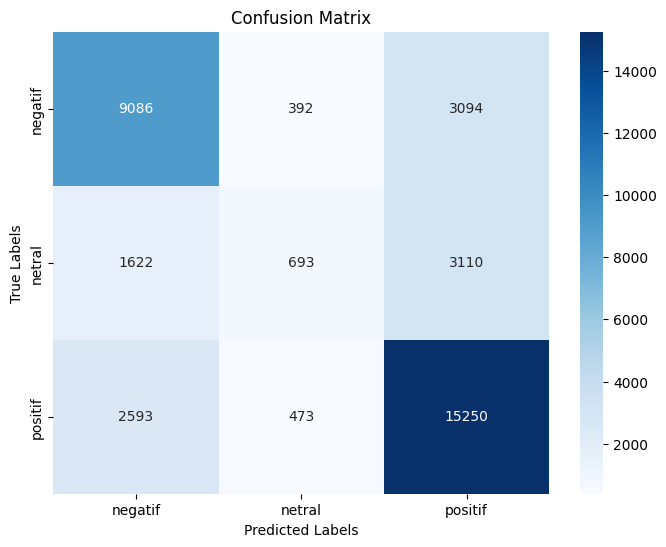

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Membuat prediksi menggunakan model
y_pred_prob = model_lstm.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Bobot Bias Model LSTM 1

In [ ]:
# Jumlah neuron masukan dan neuron tersembunyi
input_neurons = 6283
hidden_neurons = 137

# Get weights and biases of the first layer (LSTM layer)
weights_layer1 = model_lstm.layers[0].get_weights()
W1, U1, b1 = weights_layer1
W1.shape, U1.shape, b1.shape

# Splitting weights into input, forget, cell, and output gates
W1_i = U1[:, :hidden_neurons]
W1_f = U1[:, hidden_neurons:hidden_neurons*2]
W1_c = U1[:, hidden_neurons*2:hidden_neurons*3]
W1_o = U1[:, hidden_neurons*3:]

# Splitting recurrent weights into input, forget, cell, and output gates
U1_i = W1[:, :hidden_neurons]
U1_f = W1[:, hidden_neurons:hidden_neurons*2]
U1_c = W1[:, hidden_neurons*2:hidden_neurons*3]
U1_o = W1[:, hidden_neurons*3:]

# Splitting biases into input, forget, cell, and output gates
b1_i = b1[:hidden_neurons]
b1_f = b1[hidden_neurons:hidden_neurons*2]
b1_c = b1[hidden_neurons*2:hidden_neurons*3]
b1_o = b1[hidden_neurons*3:]

# Printing shapes of weights and biases
print("Shapes of weights and biases:")
print("W1_i shape:", W1_i.shape)
print("W1_f shape:", W1_f.shape)
print("W1_c shape:", W1_c.shape)
print("W1_o shape:", W1_o.shape)
print("U1_i shape:", U1_i.shape)
print("U1_f shape:", U1_f.shape)
print("U1_c shape:", U1_c.shape)
print("U1_o shape:", U1_o.shape)
print("b1_i shape:", b1_i.shape)
print("b1_f shape:", b1_f.shape)
print("b1_c shape:", b1_c.shape)
print("b1_o shape:", b1_o.shape)

print("\nValues of weights and biases:")
print("W1_i:\n", W1_i)
print("W1_f:\n", W1_f)
print("W1_c:\n", W1_c)
print("W1_o:\n", W1_o)
print("U1_i:\n", U1_i)
print("U1_f:\n", U1_f)
print("U1_c:\n", U1_c)
print("U1_o:\n", U1_o)
print("b1_i:\n", b1_i)
print("b1_f:\n", b1_f)
print("b1_c:\n", b1_c)
print("b1_o:\n", b1_o)

Shapes of weights and biases:
W1_i shape: (137, 137)
W1_f shape: (137, 137)
W1_c shape: (137, 137)
W1_o shape: (137, 137)
U1_i shape: (6283, 137)
U1_f shape: (6283, 137)
U1_c shape: (6283, 137)
U1_o shape: (6283, 137)
b1_i shape: (137,)
b1_f shape: (137,)
b1_c shape: (137,)
b1_o shape: (137,)

Values of weights and biases:
W1_i:
 [[-0.00454617  0.02562993 -0.02094579 ... -0.03321166  0.0413741
   0.09743743]
 [-0.01130112 -0.01239204 -0.00733451 ...  0.04169333  0.03062128
  -0.01319784]
 [-0.08618926 -0.08215226 -0.05990648 ...  0.02700712 -0.05145922
   0.06670895]
 ...
 [ 0.00471709  0.00620431 -0.01484814 ...  0.00166702  0.05741647
   0.04783014]
 [-0.04646607 -0.00606527  0.00963593 ...  0.03047909  0.03034221
   0.0223576 ]
 [ 0.00807775  0.01145085 -0.00865359 ...  0.03189326  0.04263153
  -0.02807446]]
W1_f:
 [[-0.01991545 -0.03301898  0.01509226 ... -0.00223089 -0.01333703
  -0.02415998]
 [ 0.00179689  0.06195745 -0.02470766 ... -0.01681767  0.01036131
   0.00796627]
 [-0.018

In [ ]:
# Get weights and biases of the output layer
weights_output_layer = model_lstm.layers[1].get_weights()
W_output, b_output = weights_output_layer

# Print shapes of weights and biases
print("Shapes of weights and biases of the output layer:")
print("W_output shape:", W_output.shape)
print("b_output shape:", b_output.shape)

# Print values of weights and biases
print("\nValues of weights and biases of the output layer:")
print("W_output:\n", W_output)
print("b_output:\n", b_output)

Shapes of weights and biases of the output layer:
W_output shape: (137, 3)
b_output shape: (3,)

Values of weights and biases of the output layer:
W_output:
 [[-3.84570986e-01  6.25671804e-01 -3.69673342e-01]
 [-3.99025947e-01 -1.66934475e-01  2.37803087e-01]
 [-7.37909228e-02  2.61390924e-01 -4.35086995e-01]
 [-8.21731836e-02  3.09890490e-02 -2.65763074e-01]
 [-4.03471962e-02  3.96000743e-02 -3.27597409e-01]
 [ 2.66742289e-01 -1.39422849e-01 -3.64123762e-01]
 [ 8.16842377e-01 -2.65144370e-02 -7.44013727e-01]
 [-1.07890055e-01  3.72380540e-02 -1.52663970e-02]
 [ 5.31791747e-01  1.98578052e-02 -3.08406234e-01]
 [ 9.99595150e-02 -3.78574640e-01  2.45052293e-01]
 [-2.29816854e-01 -1.60535365e-01  1.90439016e-01]
 [-3.11494470e-01 -2.14528576e-01  5.60467422e-01]
 [ 2.80269086e-01 -2.62240082e-01 -7.32555166e-02]
 [-1.05707653e-01  6.73032105e-02 -1.38130054e-01]
 [-1.49124682e-01 -1.73843876e-01  4.61326957e-01]
 [ 3.08263171e-02 -5.86598933e-01  5.50502062e-01]
 [ 4.35509026e-01 -3.85488

Prediksi Data Uji Model LSTM 1

In [ ]:
# Prediksi dengan fungsi
predictions = model_lstm.predict(X_test_3d)

# Misalnya, untuk mendapatkan prediksi untuk data uji dengan indeks 8
prediction_index_8 = predictions[8]

print("Prediksi untuk data uji dengan indeks 8:", prediction_index_8)

1135/1135 [==============================] - 29s 24ms/step
Prediksi untuk data uji dengan indeks 8: [0.8328295  0.05729032 0.10988019]


In [ ]:
import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi aktivasi tanh
def tanh(x):
    return np.tanh(x)

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Fungsi forward pass manual untuk model LSTM
def lstm_forward_pass(X, W1, U1, b1, h_prev, cell_state_prev):
    # Layer 1: Input, recurrent, dan bias untuk gates
    input_gate_input = np.dot(X, U1_i) + np.dot(h_prev, W1_i) + b1_i
    input_gate_output = sigmoid(input_gate_input)

    forget_gate_input = np.dot(X, U1_f) + np.dot(h_prev, W1_f) + b1_f
    forget_gate_output = sigmoid(forget_gate_input)

    output_gate_input = np.dot(X, U1_o) + np.dot(h_prev,  W1_o) + b1_o
    output_gate_output = sigmoid(output_gate_input)

    # Layer 2: Bobot untuk cell state
    cell_state_input = np.dot(X, U1_c) + np.dot(h_prev, W1_c) + b1_c
    cell_state_output = tanh(cell_state_input)

    # Update cell state
    cell_state = forget_gate_output * cell_state_prev + input_gate_output * cell_state_output

    # Update hidden state
    h = output_gate_output * tanh(cell_state)

    return h, cell_state

# Fungsi forward pass manual untuk model LSTM dengan layer output softmax
def lstm_forward_pass_with_softmax(X, U1, W1, b1, W_output, b_output, h_prev, cell_state_prev):
    # Lakukan forward pass LSTM
    h, cell_state = lstm_forward_pass(X, W1, U1, b1, h_prev, cell_state_prev)

    # Hitung output layer input
    output_layer_input = np.dot(h, W_output) + b_output

    # Hitung output layer output (softmax)
    output_layer_output = softmax(output_layer_input)

    return output_layer_output

# Misalkan X_test_sample adalah contoh data uji pertama
X_test_sample = X_test_array[8].reshape(1, -1)

# Inisialisasi h_prev dan cell_state_prev dengan nilai nol
h_prev = np.zeros((1, 137))  # Sesuaikan dengan dimensi yang sesuai
cell_state_prev = np.zeros((1, 137))  # Jika memang diperlukan

# Lakukan forward pass manual dengan output softmax
output = lstm_forward_pass_with_softmax(X_test_sample, W1, U1, b1, W_output, b_output, h_prev, cell_state_prev)
print("Output from the Model (with Softmax):")
print(output)

# Lakukan forward pass manual
input_gate_input = np.dot(X_test_sample, U1_i) + np.dot(h_prev, W1_i) + b1_i
input_gate_output = sigmoid(input_gate_input)

forget_gate_input = np.dot(X_test_sample, U1_f) + np.dot(h_prev, W1_f) + b1_f
forget_gate_output = sigmoid(forget_gate_input)

output_gate_input = np.dot(X_test_sample, U1_o) + np.dot(h_prev, W1_o) + b1_o
output_gate_output = sigmoid(output_gate_input)

cell_state_input = np.dot(X_test_sample, U1_c) + np.dot(h_prev, W1_c) + b1_c
cell_state_output = tanh(cell_state_input)

print("Shapes of matrices:")
print("X_test_sample shape:", X_test_sample.shape)
print("U1_i shape:", U1_i.shape)
print("W1_i shape:", W1_i.shape)
print("b1_i shape:", b1_i.shape)
print("input_gate_input shape:", input_gate_input.shape)
print("input_gate_output shape:", input_gate_output.shape)
print("forget_gate_input shape:", forget_gate_input.shape)
print("forget_gate_output shape:", forget_gate_output.shape)
print("output_gate_input shape:", output_gate_input.shape)
print("output_gate_output shape:", output_gate_output.shape)
print("cell_state_input shape:", cell_state_input.shape)
print("cell_state_output shape:", cell_state_output.shape)

# Print values of matrices
print("\nValues of matrices:")
print("Input Gate Input:")
print(input_gate_input)
print("\nInput Gate Output:")
print(input_gate_output)
print("\nForget Gate Input:")
print(forget_gate_input)
print("\nForget Gate Output:")
print(forget_gate_output)
print("\nOutput Gate Input:")
print(output_gate_input)
print("\nOutput Gate Output:")
print(output_gate_output)
print("\nCell State Input:")
print(cell_state_input)
print("\nCell State Output:")
print(cell_state_output)

Output from the Model (with Softmax):
[[0.83282947 0.05729031 0.10988021]]
Shapes of matrices:
X_test_sample shape: (1, 6283)
U1_i shape: (6283, 137)
W1_i shape: (137, 137)
b1_i shape: (137,)
input_gate_input shape: (1, 137)
input_gate_output shape: (1, 137)
forget_gate_input shape: (1, 137)
forget_gate_output shape: (1, 137)
output_gate_input shape: (1, 137)
output_gate_output shape: (1, 137)
cell_state_input shape: (1, 137)
cell_state_output shape: (1, 137)

Values of matrices:
Input Gate Input:
[[-0.51802831 -0.3859418   0.85826873 -0.57677553 -0.87528466 -0.32032631
   1.60182169  0.84608632  0.4199112   1.05698346  1.27341023  0.20658118
  -0.24918093  0.5528249   0.65390942  0.57921263  0.04163203 -0.35395913
  -0.63110955  0.59050112 -0.69120521 -0.61391971 -0.0823624   0.47695997
  -1.45395986 -0.23694974 -1.48503298 -0.03608196  0.91545885 -0.07894474
  -0.29043349 -1.84909289  0.05582854  0.35589116  0.15563169 -0.24110279
  -1.12971719 -0.08825711 -0.71075269 -0.92416601 -1.

In [ ]:
print(h_t)

[[-0.08208011 -0.17797206 -0.20420615  0.0019771  -0.08658821  0.18318217
  -0.16711224  0.24292293 -0.17356966  0.18680292  0.28618778  0.31773551
  -0.05164844  0.2689021   0.0475617   0.28073094  0.40049102 -0.20889099
   0.32017013  0.09159572 -0.06620703  0.13543877  0.12291427 -0.18764762
   0.07027085  0.50584548  0.2139872  -0.14276109 -0.46531257  0.11164817
   0.30639123 -0.01368034  0.04739828  0.10737455 -0.31191374  0.1346335
   0.04600778  0.24998577 -0.13808086  0.16668911 -0.17311729  0.1307227
  -0.44723039  0.01100668  0.2456885   0.11998091 -0.17945672  0.07571067
   0.07087227  0.14924596  0.00080448 -0.09846445 -0.25287622  0.17962299
   0.1543135  -0.15770359 -0.12818478 -0.14478736 -0.08360727  0.00912216
  -0.19066759  0.06881342 -0.15498938  0.08958834  0.07226927  0.02046621
  -0.17006914  0.05255679  0.06530431  0.18443627 -0.12460086  0.24325117
  -0.0548423  -0.07147019 -0.41923191  0.05046281 -0.15844096  0.24202825
   0.25116696  0.32626721  0.16111079  0

In [ ]:
# Cetak hasil dot product untuk setiap gate
print("\nDot product results:")
print("Dot product of X_test_sample with U1_i:")
print(np.dot(X_test_sample, U1_i))
print("Dot product of X_test_sample with U1_f:")
print(np.dot(X_test_sample, U1_f))
print("Dot product of X_test_sample with U1_o:")
print(np.dot(X_test_sample, U1_o))
print("Dot product of X_test_sample with U1_c:")
print(np.dot(X_test_sample, U1_c))


Dot product results:
Dot product of X_test_sample with U1_i:
[[-0.62790683 -0.41728405  0.81407943 -0.58477933 -0.88781969 -0.34499853
   1.43535799  0.84418841  0.36276991  1.01667062  1.26020956  0.14169501
  -0.27371211  0.54738082  0.61562581  0.47793236 -0.01509331 -0.4032761
  -0.71188059  0.57629096 -0.72110791 -0.63865967 -0.09997994  0.43269232
  -1.47227904 -0.30627348 -1.62411891 -0.04107651  0.89465131 -0.10856111
  -0.33147114 -1.94917948  0.02498176  0.26608009  0.08134745 -0.25420668
  -1.32688394 -0.19205979 -0.7107514  -1.02640151 -1.09367363 -1.1798971
   0.51052954  0.58241076  0.06420038 -1.32892297 -0.05475205 -0.49524121
  -1.84122862 -0.4878427  -1.46075266 -0.08582756  0.03832258  1.18860733
  -0.22738274 -0.10542637  0.84978414 -0.41131994 -1.19867597 -0.96517171
   1.24695496  0.28284281  1.41673588 -0.17440624  0.05184071 -2.20870667
   0.72750648 -1.53466715 -0.30363521 -0.29850176 -0.6561283   0.15706582
  -0.44747776 -0.18214012  0.82036706 -0.69823999  0

In [ ]:
# Hitung nilai cell state
c_t = forget_gate_output * cell_state_prev + input_gate_output * cell_state_output

# Hitung nilai hidden state
h_t = output_gate_output * tanh(c_t)

# Cetak nilai matriks cell state
print("Matrix c_t:")
print(c_t)

# Cetak nilai matriks hidden state
print("\nMatrix h_t:")
print(h_t)

Matrix c_t:
[[-0.21752376 -0.28473183 -0.51035483  0.1239278  -0.15965019  0.30769602
   0.18297118  0.54415729 -0.43601926 -0.06651444  0.45479283  0.27040755
   0.00981022  0.43886671  0.10951572  0.55925374  0.18797725 -0.26369726
   0.32146845  0.29000907 -0.06604321  0.24022675  0.39335149  0.09912506
   0.00260807  0.43847469  0.09529776 -0.04621705 -0.63293787  0.19742984
   0.31775684 -0.1356457   0.4159531   0.5810467  -0.51357049  0.10956637
   0.24415955  0.3958376  -0.19051411  0.27006694 -0.16628615  0.11931644
  -0.65302967  0.17259042  0.39419318  0.22979894 -0.11464922  0.07886865
   0.13607815  0.02659375 -0.21088842 -0.15255327 -0.31317182  0.06646034
   0.13350947 -0.33811936 -0.51366168 -0.18510332  0.10841128 -0.02781471
  -0.43647     0.07683512 -0.57690717  0.40158044 -0.0565375   0.10178489
  -0.48622223  0.09901858  0.31845891  0.42750031 -0.11560044  0.44652394
  -0.0344227  -0.06213043 -0.37115148  0.34320412 -0.39820331  0.472677
   0.30210833  0.47045042  0

In [ ]:
# Vektor masukan lapisan output
bobot = np.dot(h_t, W_output)
output_layer_input

array([[ 1.31871021, -1.35798716, -0.70672788]])

In [ ]:
# Lakukan forward pass manual dengan output softmax
output = lstm_forward_pass_with_softmax(X_test_sample, W1, U1, b1, W_output, b_output, h_prev, cell_state_prev)
print("Output from the LSTM Layer:")
print(output)

Output from the LSTM Layer:
[[0.83282947 0.05729031 0.10988021]]


Load Model LSTM 1

In [ ]:
from keras.models import load_model
model_lstm = load_model('/content/drive/My Drive/models/modelLSTM.h5')

import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fungsi aktivasi tanh
def tanh(x):
    return np.tanh(x)

# Fungsi softmax
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Fungsi forward pass manual untuk model LSTM
def lstm_forward_pass(X, W1, U1, b1, h_prev, cell_state_prev):
    # Layer 1: Input, recurrent, dan bias untuk gates
    input_gate_input = np.dot(X, U1_i) + np.dot(h_prev, W1_i) + b1_i
    input_gate_output = sigmoid(input_gate_input)

    forget_gate_input = np.dot(X, U1_f) + np.dot(h_prev, W1_f) + b1_f
    forget_gate_output = sigmoid(forget_gate_input)

    output_gate_input = np.dot(X, U1_o) + np.dot(h_prev,  W1_o) + b1_o
    output_gate_output = sigmoid(output_gate_input)

    # Layer 2: Bobot untuk cell state
    cell_state_input = np.dot(X, U1_c) + np.dot(h_prev, W1_c) + b1_c
    cell_state_output = tanh(cell_state_input)

    # Update cell state
    cell_state = forget_gate_output * cell_state_prev + input_gate_output * cell_state_output

    # Update hidden state
    h = output_gate_output * tanh(cell_state)

    return h, cell_state

# Fungsi forward pass manual untuk model LSTM dengan layer output softmax
def lstm_forward_pass_with_softmax(X, U1, W1, b1, W_output, b_output, h_prev, cell_state_prev):
    # Lakukan forward pass LSTM
    h, cell_state = lstm_forward_pass(X, W1, U1, b1, h_prev, cell_state_prev)

    # Hitung output layer input
    output_layer_input = np.dot(h, W_output) + b_output

    # Hitung output layer output (softmax)
    output_layer_output = softmax(output_layer_input)

    return output_layer_output

# Misalkan X_test_sample adalah contoh data uji pertama
X_test_sample = X_test_array[8].reshape(1, -1)

# Inisialisasi h_prev dan cell_state_prev dengan nilai nol
h_prev = np.zeros((1, 137))  # Sesuaikan dengan dimensi yang sesuai
cell_state_prev = np.zeros((1, 137))  # Jika memang diperlukan

# Lakukan forward pass manual dengan output softmax
output = lstm_forward_pass_with_softmax(X_test_sample, W1, U1, b1, W_output, b_output, h_prev, cell_state_prev)
print("Output from the Model (with Softmax):")
print(output)

# Lakukan forward pass manual
input_gate_input = np.dot(X_test_sample, U1_i) + np.dot(h_prev, W1_i) + b1_i
input_gate_output = sigmoid(input_gate_input)

forget_gate_input = np.dot(X_test_sample, U1_f) + np.dot(h_prev, W1_f) + b1_f
forget_gate_output = sigmoid(forget_gate_input)

output_gate_input = np.dot(X_test_sample, U1_o) + np.dot(h_prev, W1_o) + b1_o
output_gate_output = sigmoid(output_gate_input)

cell_state_input = np.dot(X_test_sample, U1_c) + np.dot(h_prev, W1_c) + b1_c
cell_state_output = tanh(cell_state_input)

print("Shapes of matrices:")
print("X_test_sample shape:", X_test_sample.shape)
print("U1_i shape:", U1_i.shape)
print("W1_i shape:", W1_i.shape)
print("b1_i shape:", b1_i.shape)
print("input_gate_input shape:", input_gate_input.shape)
print("input_gate_output shape:", input_gate_output.shape)
print("forget_gate_input shape:", forget_gate_input.shape)
print("forget_gate_output shape:", forget_gate_output.shape)
print("output_gate_input shape:", output_gate_input.shape)
print("output_gate_output shape:", output_gate_output.shape)
print("cell_state_input shape:", cell_state_input.shape)
print("cell_state_output shape:", cell_state_output.shape)

# Print values of matrices
print("\nValues of matrices:")
print("Input Gate Input:")
print(input_gate_input)
print("\nInput Gate Output:")
print(input_gate_output)
print("\nForget Gate Input:")
print(forget_gate_input)
print("\nForget Gate Output:")
print(forget_gate_output)
print("\nOutput Gate Input:")
print(output_gate_input)
print("\nOutput Gate Output:")
print(output_gate_output)
print("\nCell State Input:")
print(cell_state_input)
print("\nCell State Output:")
print(cell_state_output)

# Cetak hasil dot product untuk setiap gate
print("\nDot product results:")
print("Dot product of X_test_sample with U1_i:")
print(np.dot(X_test_sample, U1_i))
print("Dot product of X_test_sample with U1_f:")
print(np.dot(X_test_sample, U1_f))
print("Dot product of X_test_sample with U1_o:")
print(np.dot(X_test_sample, U1_o))
print("Dot product of X_test_sample with U1_c:")
print(np.dot(X_test_sample, U1_c))

# Hitung nilai cell state
c_t = forget_gate_output * cell_state_prev + input_gate_output * cell_state_output

# Hitung nilai hidden state
h_t = output_gate_output * tanh(c_t)

# Cetak nilai matriks cell state
print("Matrix c_t:")
print(c_t)

# Cetak nilai matriks hidden state
print("\nMatrix h_t:")
print(h_t)
# Lakukan forward pass manual dengan output softmax
output = lstm_forward_pass_with_softmax(X_test_sample, W1, U1, b1, W_output, b_output, h_prev, cell_state_prev)
print("Output from the LSTM Layer:")
print(output)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Melakukan prediksi pada data uji menggunakan model yang sudah dilatih
y_pred_prob = model_lstm.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Menghitung nilai akurasi
accuracy = accuracy_score(y_true_encoded, y_pred)
print("Accuracy:", accuracy)


1135/1135 [==============================] - 3s 2ms/step
Confusion Matrix:
[[ 9086   392  3094]
 [ 1622   693  3110]
 [ 2593   473 15250]]
Classification Report:
              precision    recall  f1-score   support

     negatif       0.68      0.72      0.70     12572
      netral       0.44      0.13      0.20      5425
     positif       0.71      0.83      0.77     18316

    accuracy                           0.69     36313
   macro avg       0.61      0.56      0.56     36313
weighted avg       0.66      0.69      0.66     36313

Accuracy: 0.6892572907774075


MODEL LSTM 2

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.utils import Sequence
import numpy as np
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the filepath for ModelCheckpoint
filepath_lstm = '/content/drive/My Drive/models/modelLSTM2.h5'

# Define ModelCheckpoint callback to save the best model
checkpoint_lstm = ModelCheckpoint(filepath_lstm, monitor='accuracy', save_best_only=True, mode='max', verbose=1)

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Define batch size
batch_size = 32

class DataGenerator(Sequence):
    def __init__(self, X_data, y_data, batch_size):
        self.X_data = X_data
        self.y_data = y_data
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.X_data))

    def __len__(self):
        return int(np.ceil(len(self.X_data) / self.batch_size))

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = min((index + 1) * self.batch_size, len(self.X_data))

        batch_X = self.X_data[start_index:end_index]
        batch_y = self.y_data[start_index:end_index]

        return batch_X, batch_y

# Ubah dimensi input untuk LSTM
X_train_3d = np.reshape(X_train_array, (X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_3d = np.reshape(X_test_array, (X_test_array.shape[0], 1, X_test_array.shape[1]))

# Membuat instance dari DataGenerator untuk data pelatihan
train_generator = DataGenerator(X_train_3d, pd.get_dummies(y_train), batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the model architecture
model_lstm2 = Sequential()
model_lstm2.add(LSTM(491, input_shape=(X_train_3d.shape[1], X_train_3d.shape[2]), return_sequences=True))
model_lstm2.add(LSTM(38))
model_lstm2.add(Dense(3, activation='softmax'))
model_lstm2.summary()

# Compile the model
model_lstm2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model with training data and validate with validation data, while adding the ModelCheckpoint and EarlyStopping callbacks
history_lstm2 = model_lstm2.fit(train_generator,
                              epochs=20,
                              steps_per_epoch=len(train_generator),
                              callbacks=[checkpoint_lstm, early_stopping])

# Evaluate the model with test data
loss, accuracy = model_lstm2.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Accuracy:", accuracy)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 491)            13306100  
                                                                 
 lstm_1 (LSTM)               (None, 38)                80560     
                                                                 
 dense_3 (Dense)             (None, 3)                 117       
                                                                 
Total params: 13386777 (51.07 MB)
Trainable params: 13386777 (51.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
4539/4540 [============================>.] - ETA: 0s - loss: 0.9375 - accuracy: 0.5584
Epoch 1: accuracy improved from -inf to 0.55849, saving model to /content/drive/My Drive/models/modelLSTM2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4540/4540 [==============================] - 62s 13ms/step - loss: 0.9374 - accuracy: 0.5585
Epoch 2/20
4538/4540 [============================>.] - ETA: 0s - loss: 0.8147 - accuracy: 0.6654
Epoch 2: accuracy improved from 0.55849 to 0.66531, saving model to /content/drive/My Drive/models/modelLSTM2.h5
4540/4540 [==============================] - 69s 15ms/step - loss: 0.8148 - accuracy: 0.6653
Epoch 3/20
4537/4540 [============================>.] - ETA: 0s - loss: 0.7812 - accuracy: 0.6792
Epoch 3: accuracy improved from 0.66531 to 0.67921, saving model to /content/drive/My Drive/models/modelLSTM2.h5
4540/4540 [==============================] - 54s 12ms/step - loss: 0.7812 - accuracy: 0.6792
Epoch 4/20
4540/4540 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.6831
Epoch 4: accuracy improved from 0.67921 to 0.68308, saving model to /content/drive/My Drive/models/modelLSTM2.h5
4540/4540 [==============================] - 54s 12ms/step - loss: 0.7618 - accuracy: 0.

Evaluasi Model LSTM 2

1135/1135 [==============================] - 6s 5ms/step - loss: 0.7318 - accuracy: 0.6888
Test Loss: 0.7318261861801147
Test Accuracy: 0.6888442039489746
1135/1135 [==============================] - 5s 4ms/step


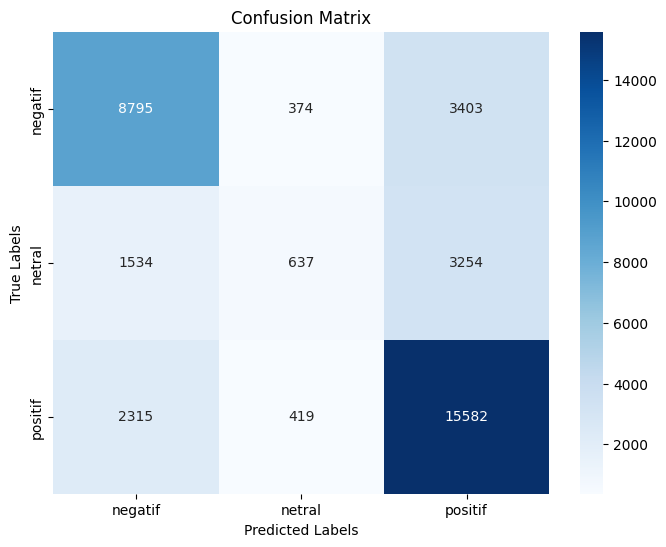

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Evaluate the model
loss, accuracy = model_lstm2.evaluate(X_test_3d, pd.get_dummies(y_test))
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Membuat prediksi menggunakan model
y_pred_prob = model_lstm2.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)

# Plot matriks konfusi
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get the initial weights of the model
initial_weights_lstm2 = model_lstm2.get_weights()

# Display initial weights of each layer
print("\nInitial Weights:")
for i, layer_weights in enumerate(initial_weights_lstm2):
    print(f"Layer {i+1} shape: {layer_weights.shape}")
    print(layer_weights)

# Access LSTM layer and its weightsmodel
lstm_layer1 = model_lstm2.layers[0]
lstm_weights1 = lstm_layer1.get_weights()

# Accessing weights for each gate in the first LSTM layer
forget_gate_weights1 = lstm_weights1[0]
input_gate_weights1 = lstm_weights1[1]
output_gate_weights1 = lstm_weights1[2]

# Display weights for each gate in the first LSTM layer
print("\nFirst LSTM Layer Weights:")
print(f"Forget Gate Weights: {forget_gate_weights1.shape}")
print(forget_gate_weights1)
print(f"Input Gate Weights: {input_gate_weights1.shape}")
print(input_gate_weights1)
print(f"Output Gate Weights: {output_gate_weights1.shape}")
print(output_gate_weights1)

# Accessing weights for the second LSTM layer
lstm_layer2 = model_lstm2.layers[1]
lstm_weights2 = lstm_layer2.get_weights()

# Accessing weights for each gate in the second LSTM layer
forget_gate_weights2 = lstm_weights2[0]
input_gate_weights2 = lstm_weights2[1]
output_gate_weights2 = lstm_weights2[2]

# Display weights for each gate in the second LSTM layer
print("\nSecond LSTM Layer Weights:")
print(f"Forget Gate Weights: {forget_gate_weights2.shape}")
print(forget_gate_weights2)
print(f"Input Gate Weights: {input_gate_weights2.shape}")
print(input_gate_weights2)
print(f"Output Gate Weights: {output_gate_weights2.shape}")
print(output_gate_weights2)



Initial Weights:
Layer 1 shape: (6283, 1964)
[[-0.0127174  -0.00428935  0.02760145 ... -0.02373751  0.02201069
   0.02170293]
 [-0.02582027  0.00991963  0.01569578 ...  0.02246289  0.01558489
   0.02499852]
 [-0.02630002  0.00468017 -0.00627325 ...  0.00720306 -0.01606276
  -0.00076082]
 ...
 [-0.00080398 -0.01770852  0.01230975 ...  0.01486595  0.02672102
  -0.00563584]
 [-0.0195197   0.02398121 -0.01379472 ... -0.01125445 -0.01717639
  -0.01898216]
 [-0.01791224 -0.01002473  0.02694436 ... -0.02641707  0.01050442
   0.01828399]]
Layer 2 shape: (491, 1964)
[[-0.00945115 -0.01647793  0.00618689 ... -0.00522041 -0.04122048
   0.02890023]
 [ 0.01288083 -0.0008831  -0.03020778 ... -0.03259186  0.00148957
  -0.01777359]
 [-0.01121915 -0.0321418  -0.03527224 ... -0.01189251 -0.00709979
  -0.02077438]
 ...
 [ 0.01821141  0.0327257  -0.03233071 ... -0.01418779  0.01657375
  -0.00330096]
 [ 0.02456548 -0.02978218 -0.01792671 ... -0.01683983 -0.06020481
   0.0038502 ]
 [-0.04365442  0.00443037

In [ ]:
# Menampilkan ringkasan model
model_lstm2.summary()

# Loop melalui semua layer dalam model
for layer in model_lstm2.layers:
    # Periksa apakah layer adalah lapisan LSTM atau Dense
    if isinstance(layer, LSTM) or isinstance(layer, Dense):
        # Peroleh bobot dari lapisan
        weights = layer.get_weights()
        if weights:
            # Cetak informasi tentang bobot
            print(f"Layer Name: {layer.name}")
            print("Weights Matrix Shape:", weights[0].shape)  # Ukuran matriks bobot
            print("Weights Matrix:")
            print(weights[0])  # Bobot
            print("Bias Vector Shape:", weights[1].shape)    # Ukuran vektor bias
            print("Bias Vector:")
            print(weights[1])    # Bias
            print("-----------------------------------")
        else:
            print(f"Layer {layer.name} has no weights.")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 491)            13306100  
                                                                 
 lstm_1 (LSTM)               (None, 38)                80560     
                                                                 
 dense_3 (Dense)             (None, 3)                 117       
                                                                 
Total params: 13386777 (51.07 MB)
Trainable params: 13386777 (51.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Layer Name: lstm
Weights Matrix Shape: (6283, 1964)
Weights Matrix:
[[-0.0127174  -0.00428935  0.02760145 ... -0.02373751  0.02201069
   0.02170293]
 [-0.02582027  0.00991963  0.01569578 ...  0.02246289  0.01558489
   0.02499852]
 [-0.02630002  0.00468017 -0.00627325 ...  0.0

Prediksi Data Uji Model LSTM 2

In [ ]:
# Lakukan prediksi pada data uji yang telah diubah dimensinya
predictions = model_lstm2.predict(X_test_3d)

# Misalnya, untuk mendapatkan prediksi untuk data uji dengan indeks 8
prediction_index_8 = predictions[8]

print("Prediksi untuk data uji dengan indeks 8:", prediction_index_8)

1135/1135 [==============================] - 5s 4ms/step
Prediksi untuk data uji dengan indeks 8: [0.83086985 0.03560012 0.13353004]


Load Model LSTM 2

In [ ]:
from keras.models import load_model

model_lstm2 = load_model('/content/drive/My Drive/models/modelLSTM2.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Melakukan prediksi pada data uji menggunakan model yang sudah dilatih
y_pred_prob = model_lstm2.predict(X_test_3d)
y_pred = np.argmax(y_pred_prob, axis=1)

# Mengubah label string menjadi bilangan bulat
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Membuat matriks konfusi
conf_matrix = confusion_matrix(y_true_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Menampilkan laporan klasifikasi
class_report = classification_report(y_true_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

# Menghitung nilai akurasi
accuracy = accuracy_score(y_true_encoded, y_pred)
print("Accuracy:", accuracy)


1135/1135 [==============================] - 9s 6ms/step
Confusion Matrix:
[[ 8795   374  3403]
 [ 1534   637  3254]
 [ 2315   419 15582]]
Classification Report:
              precision    recall  f1-score   support

     negatif       0.70      0.70      0.70     12572
      netral       0.45      0.12      0.19      5425
     positif       0.70      0.85      0.77     18316

    accuracy                           0.69     36313
   macro avg       0.61      0.56      0.55     36313
weighted avg       0.66      0.69      0.66     36313

Accuracy: 0.6888442155701815
